<a href="https://colab.research.google.com/github/Disha-1102/Cognifyz/blob/main/Level2_Cognifyz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Level 2: Task 1**

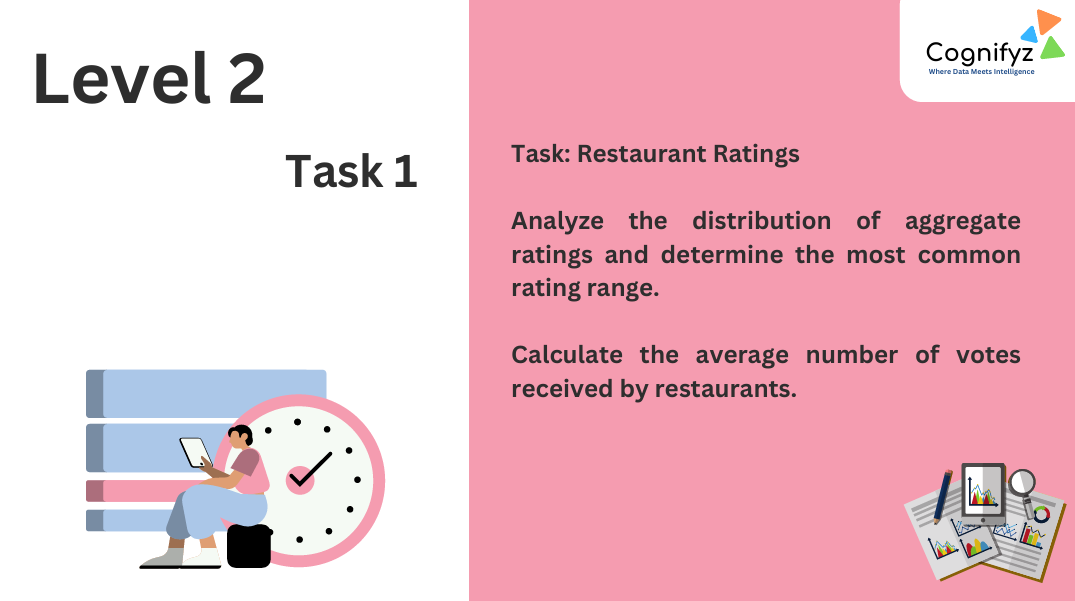

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Dataset.csv")


In [ ]:
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')



In [ ]:
bins = [0, 1, 2, 3, 4, 5]
labels = ["0–1", "1–2", "2–3", "3–4", "4–5"]

df["Rating Range"] = pd.cut(df["Aggregate rating"], bins=bins, labels=labels, include_lowest=True)


In [ ]:
rating_distribution = df["Rating Range"].value_counts().sort_index()
rating_distribution


,count
Rating Range,
0–1,2148
1–2,10
2–3,1891
3–4,4388
4–5,1114


In [ ]:
most_common_range = rating_distribution.idxmax()
most_common_range


'3–4'

/tmp/ipython-input-4247892378.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_distribution.index, y=rating_distribution.values, palette="viridis")


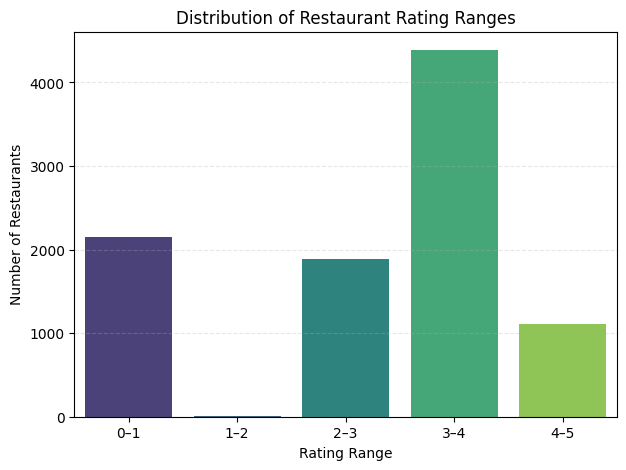

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x=rating_distribution.index, y=rating_distribution.values, palette="viridis")
plt.title("Distribution of Restaurant Rating Ranges")
plt.xlabel("Rating Range")
plt.ylabel("Number of Restaurants")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


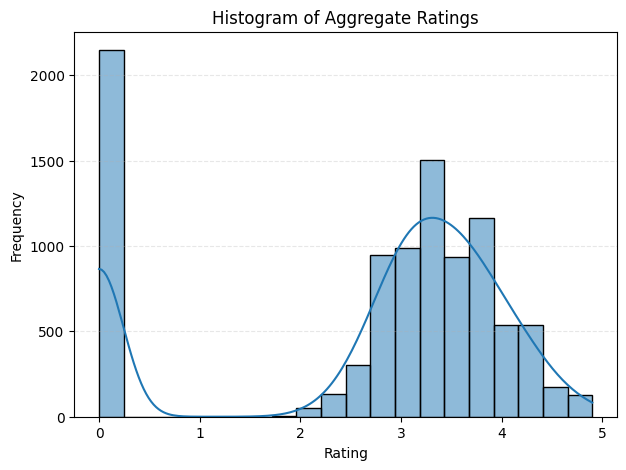

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df["Aggregate rating"], bins=20, kde=True)
plt.title("Histogram of Aggregate Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


In [ ]:
average_votes = df["Votes"].mean().round(2)
average_votes


np.float64(156.91)

# **Level 2: Task 2**

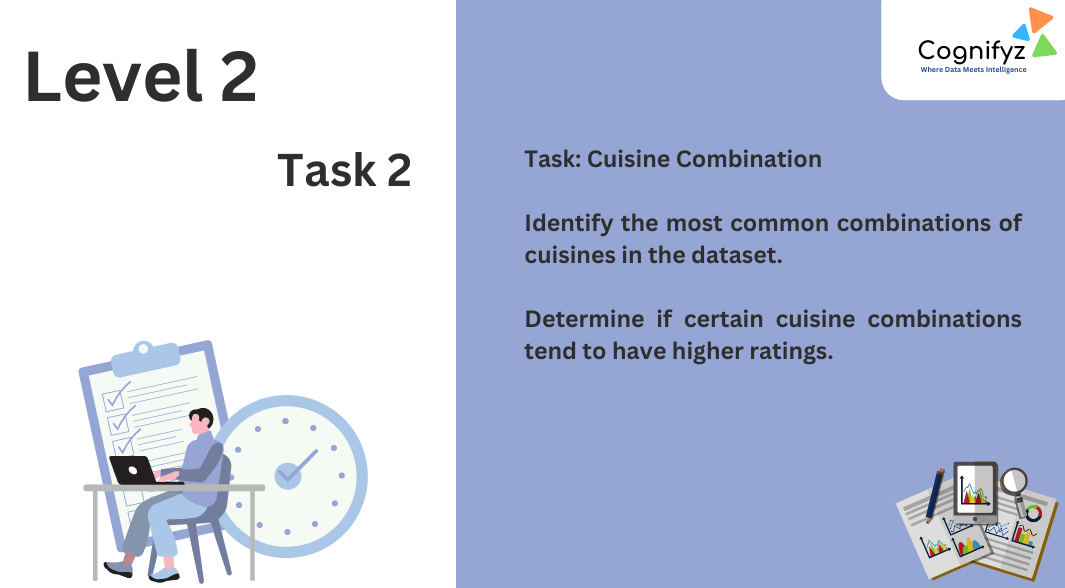

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Dataset.csv")


In [ ]:

df['Cuisines'] = df['Cuisines'].astype(str)


df['Cuisine Combo'] = (
    df['Cuisines']
    .str.split(',')
    .apply(lambda x: ", ".join(sorted([i.strip() for i in x if i.strip() != ""])))
)


In [ ]:
combo_counts = df['Cuisine Combo'].value_counts().head(10)
combo_counts


,count
Cuisine Combo,
North Indian,936
"Chinese, North Indian",616
"Mughlai, North Indian",394
Fast Food,354
Chinese,354
"Chinese, Mughlai, North Indian",306
Cafe,299
Bakery,218
"Bakery, Desserts",181


/tmp/ipython-input-3453908121.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combo_counts.values, y=combo_counts.index, palette="viridis")


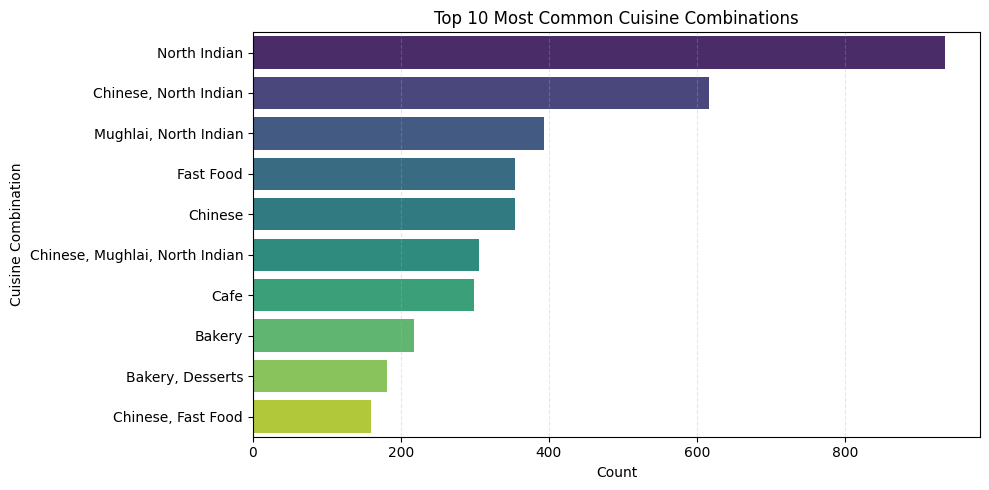

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=combo_counts.values, y=combo_counts.index, palette="viridis")
plt.title("Top 10 Most Common Cuisine Combinations")
plt.xlabel("Count")
plt.ylabel("Cuisine Combination")
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

combo_rating = (
    df.groupby('Cuisine Combo')['Aggregate rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

combo_rating


,Aggregate rating
Cuisine Combo,
"American, BBQ, Sandwich",4.9
"Bar Food, Burger, Steak",4.9
"Contemporary, European",4.9
"Indonesian, Sunda",4.9
"Hawaiian, Seafood",4.9
"American, Caribbean, Seafood",4.9
"American, Coffee and Tea",4.9
"American, Healthy Food, Mexican",4.9
"BBQ, Breakfast, Southern",4.9


/tmp/ipython-input-2880893645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combo_rating.values, y=combo_rating.index, palette="coolwarm")


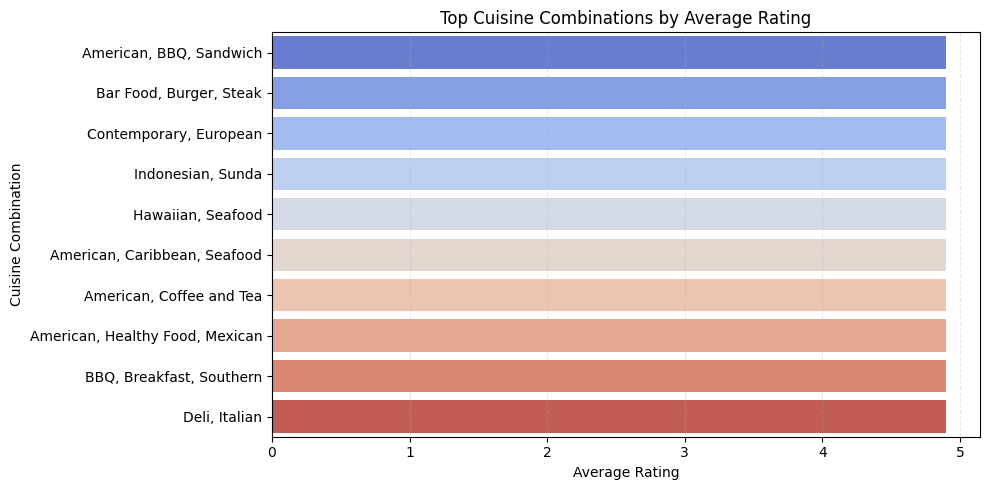

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=combo_rating.values, y=combo_rating.index, palette="coolwarm")
plt.title("Top Cuisine Combinations by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine Combination")
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


# **Level 2: Task 3**

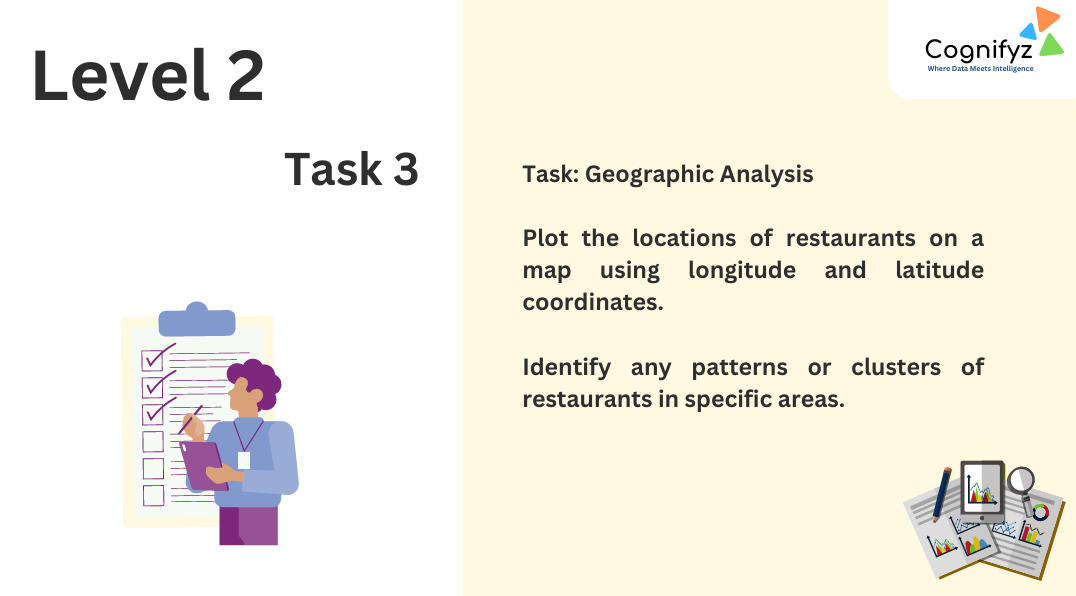

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Dataset.csv")


In [ ]:
lat_col = "Latitude"
lon_col = "Longitude"

df[lat_col] = pd.to_numeric(df[lat_col], errors='coerce')
df[lon_col] = pd.to_numeric(df[lon_col], errors='coerce')

geo_df = df.dropna(subset=[lat_col, lon_col])
print("Rows with valid coordinates:", len(geo_df))


Rows with valid coordinates: 9551


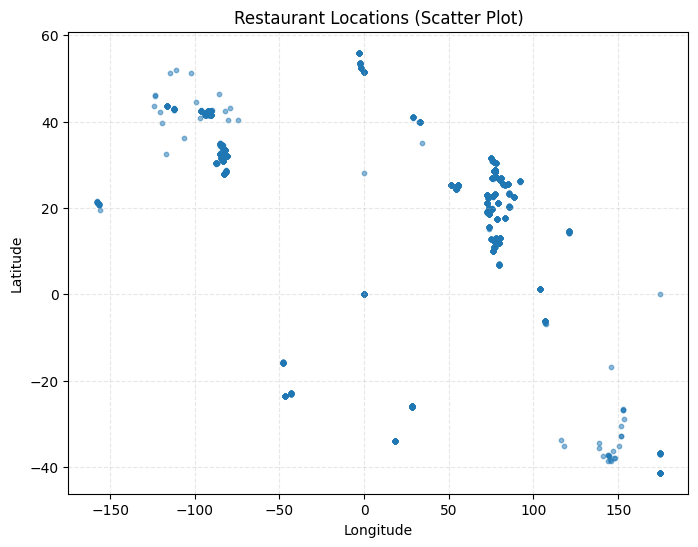

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(geo_df[lon_col], geo_df[lat_col], s=10, alpha=0.5)
plt.title("Restaurant Locations (Scatter Plot)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


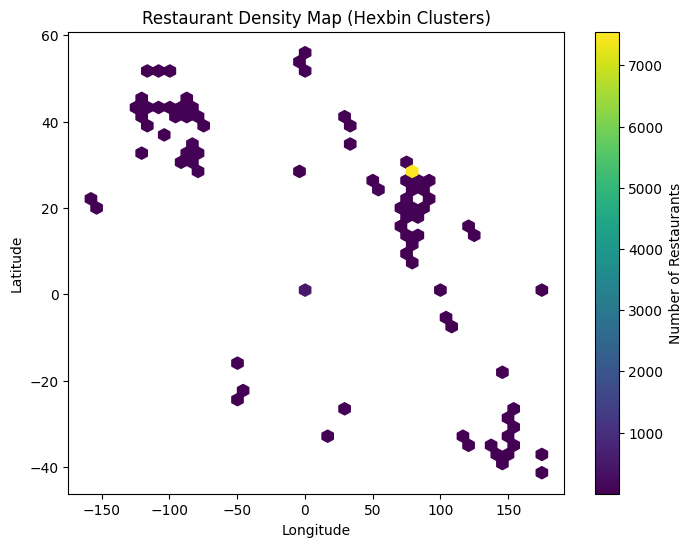

In [ ]:
plt.figure(figsize=(8,6))
plt.hexbin(geo_df[lon_col], geo_df[lat_col], gridsize=40, cmap="viridis", mincnt=1)
plt.title("Restaurant Density Map (Hexbin Clusters)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="Number of Restaurants")
plt.show()


/tmp/ipython-input-3450921158.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


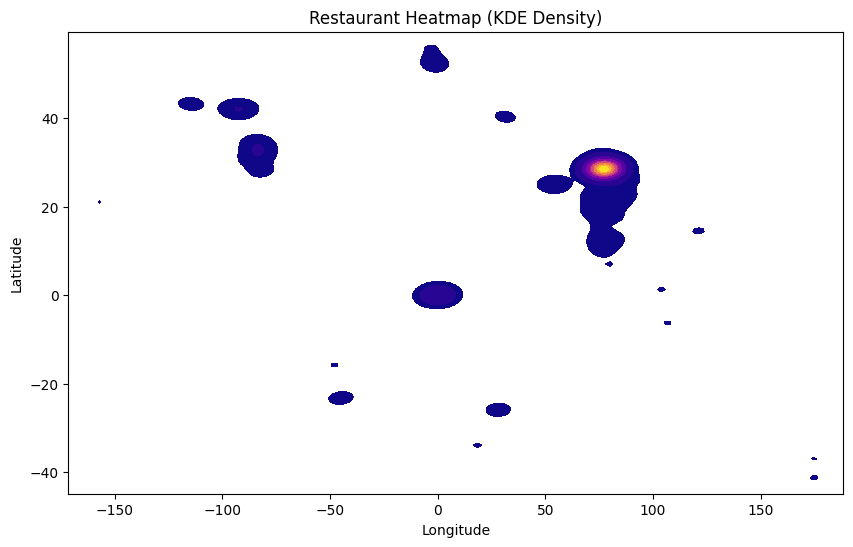

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(
    x=geo_df[lon_col], y=geo_df[lat_col],
    cmap="plasma", shade=True, bw_adjust=0.5
)
plt.title("Restaurant Heatmap (KDE Density)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


# **Level 2: Task 4**

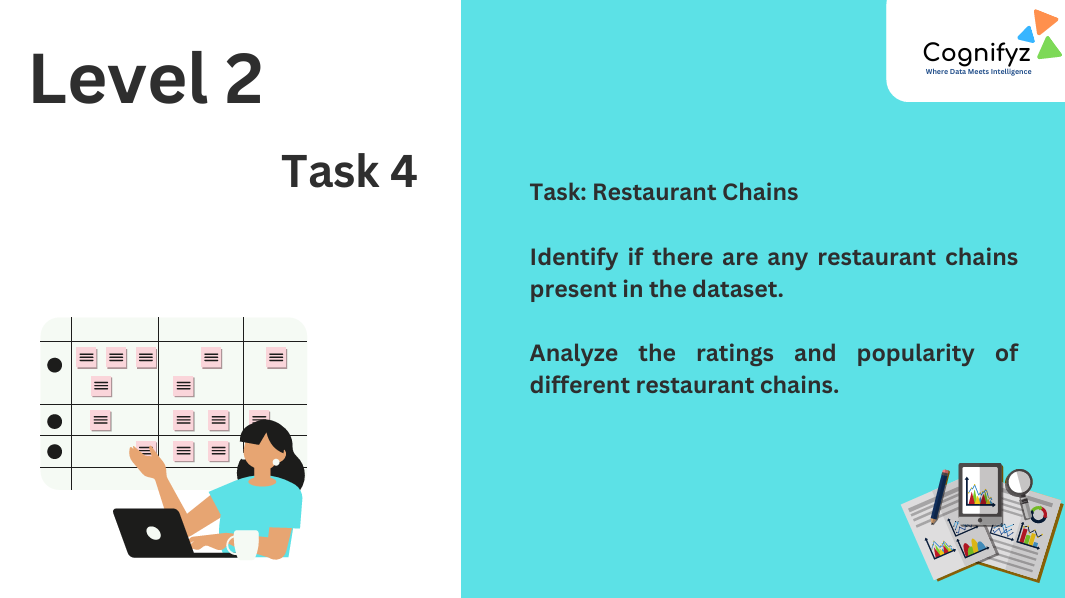

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Dataset.csv")


In [ ]:
name_col = "Restaurant Name"
rating_col = "Aggregate rating"
votes_col = "Votes"

df[rating_col] = pd.to_numeric(df[rating_col], errors="coerce")
df[votes_col] = pd.to_numeric(df[votes_col], errors="coerce")


In [ ]:
name_counts = df[name_col].value_counts()
chains = name_counts[name_counts > 1]   # appearing more than once


In [ ]:
print("Number of chains found:", len(chains))
chains.head(20)


Number of chains found: 734


,count
Restaurant Name,
Cafe Coffee Day,83
Domino's Pizza,79
Subway,63
Green Chick Chop,51
McDonald's,48
Keventers,34
Pizza Hut,30
Giani,29
Baskin Robbins,28


/tmp/ipython-input-37532586.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_chains.values, y=top_chains.index, palette="viridis")


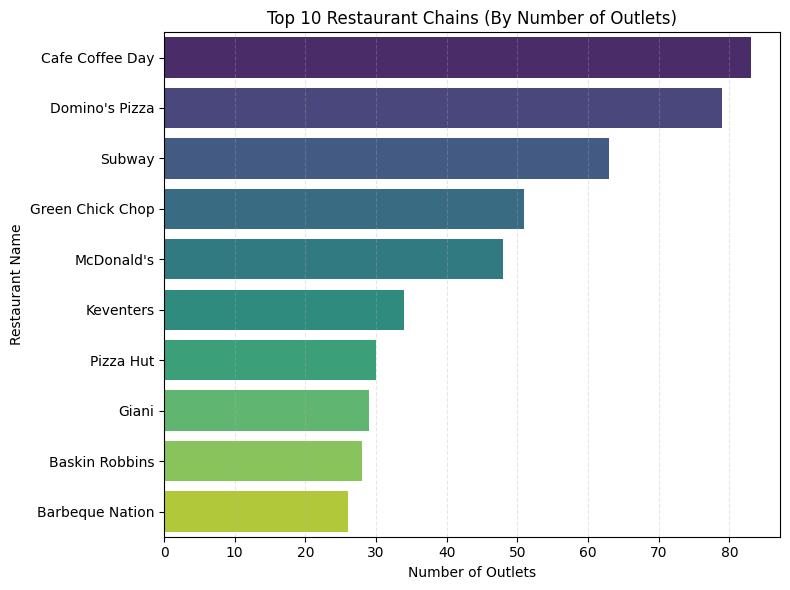

In [ ]:
top_chains = chains.head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_chains.values, y=top_chains.index, palette="viridis")
plt.title("Top 10 Restaurant Chains (By Number of Outlets)")
plt.xlabel("Number of Outlets")
plt.ylabel("Restaurant Name")
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
chain_names = chains.index.tolist()
chain_df = df[df[name_col].isin(chain_names)]


In [ ]:
chain_stats = chain_df.groupby(name_col).agg(
    Locations = (name_col, 'count'),
    Avg_Rating = (rating_col, 'mean'),
    Total_Votes = (votes_col, 'sum')
).sort_values("Locations", ascending=False)

chain_stats.head(10)


,Locations,Avg_Rating,Total_Votes
Restaurant Name,,,
Cafe Coffee Day,83,2.419277,2428
Domino's Pizza,79,2.740506,6643
Subway,63,2.907937,6124
Green Chick Chop,51,2.672549,964
McDonald's,48,3.339583,5291
Keventers,34,2.870588,1263
Pizza Hut,30,3.320000,4961
Giani,29,2.689655,854
Baskin Robbins,28,1.860714,428


/tmp/ipython-input-3984603582.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rating["Avg_Rating"], y=top_rating.index, palette="coolwarm")


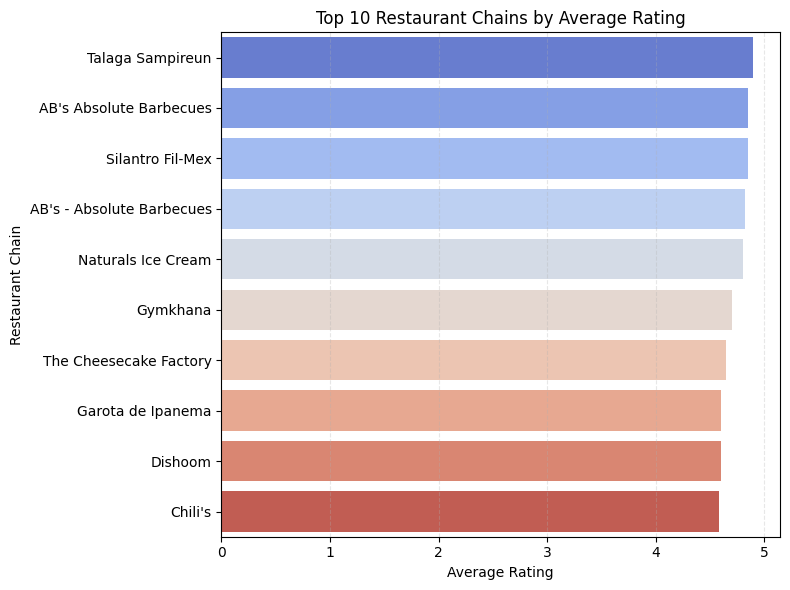

In [ ]:
top_rating = chain_stats.sort_values("Avg_Rating", ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_rating["Avg_Rating"], y=top_rating.index, palette="coolwarm")
plt.title("Top 10 Restaurant Chains by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Restaurant Chain")
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1121454719.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_popularity["Total_Votes"], y=top_popularity.index, palette="magma")


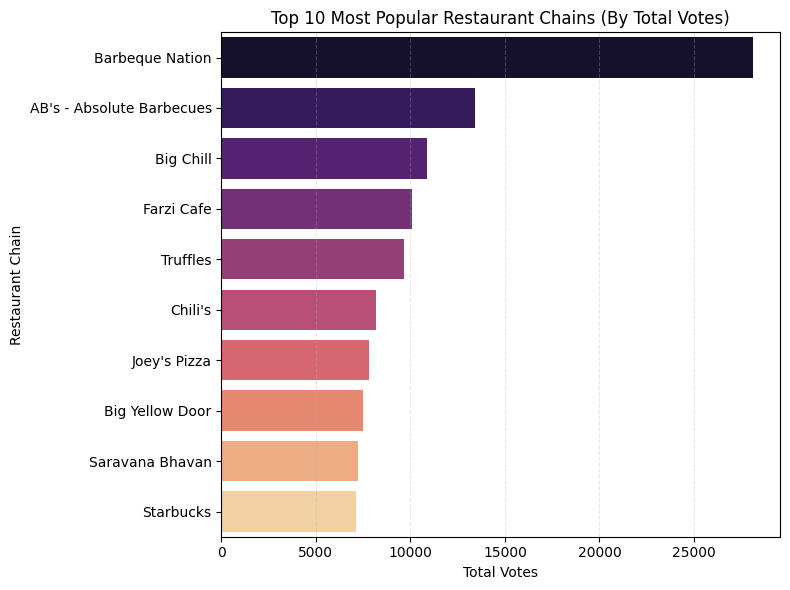

In [ ]:
top_popularity = chain_stats.sort_values("Total_Votes", ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_popularity["Total_Votes"], y=top_popularity.index, palette="magma")
plt.title("Top 10 Most Popular Restaurant Chains (By Total Votes)")
plt.xlabel("Total Votes")
plt.ylabel("Restaurant Chain")
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
